In [2]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from scipy.integrate import odeint
from scipy.optimize import minimize
import scipy.stats as st
from scipy import integrate
from lmfit import minimize, Parameters, Parameter, report_fit
%matplotlib inline
#from pepnet.encoder import Encoder
import keras
#keras.__version__
#encoder = Encoder()
#X_index = encoder.encode_index_array(["SYF", "GLYCI"], max_peptide_length=9)

pathName = os.getcwd()
print(pathName)

Using TensorFlow backend.


C:\Users\frank\iGEM


In [3]:
# Open Cov-AbDab Database
url = "https://raw.githubusercontent.com/Frankdag20/harvard-igem-2020/master/CoV-AbDab_120720.csv"
df = pd.read_csv(url, index_col=0)

# There are 1384 antibodies
print("Total # of antibodies are: " + str(len(df['CDRH3'])))

Total # of antibodies are: 1384


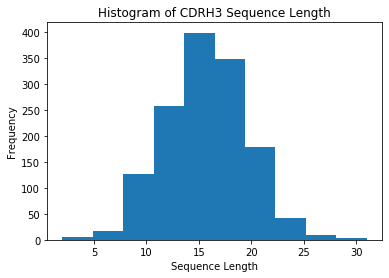

In [4]:
# Plot hisotgram of CDRH3 length
temp = df['CDRH3']
cdrh3 = []
for i in range(len(temp)):
    cdrh3.append(temp[i])
    
# Make list of the length of each sequence
plot_len = []
for i in cdrh3:
    plot_len.append(len(i))

plt.hist(plot_len)
plt.ylabel("Frequency")
plt.xlabel("Sequence Length")
plt.title("Histogram of CDRH3 Sequence Length")
plt.show()

In [5]:
# Outline example protein and all possible amino acids
example_protein = """MKLFWLLFTIGFCWAQYSSNTQQGRTSIVHLFEWRWVDIALECERYLAPKGFGGVQVSPPNENVAIHNPFRPWWERYQPVSYKLCTRSGNEDEFRNMVTRCNNVGVRIYVDAVINHMCGNAVSAGTSSTCGSYFNPGSRDFPAVPYSGWDFNDGKCKTGSGDIENYNDATQVRDCRLSGLLDLALGKDYVRSKIAEYMNHLIDIGVAGFRIDASKHMWPGDIKAILDKLHNLNSNWFPEGSKPFIYQEVIDLGGEPIKSSDYFGNGRVTEFKYGAKLGTVIRKWNGEKMSYLKNWGEGWGFMPSDRALVFVDNHDNQRGHGAGGASILTFWDARLYKMAVGFMLAHPYGFTRVMSSYRWPRYFENGKDVNDWVGPPNDNGVTKEVTINPDTTCGNDWVCEHRWRQIRNMVNFRNVVDGQPFTNWYDNGSNQVAFGRGNRGFIVFNNDDWTFSLTLQTGLPAGTYCDVISGDKINGNCTGIKIYVSDDGKAHFSISNSAEDPFIAIHAESKL""" #exchange sequence for unique analysis
amino_acid = ['C', 'D', 'S', 'Q', 'K', 'P', 'T', 'F', 'A', 'X', 'G', 'I', 'E', 'L', 'H', 'R', 'W', 'M', 'N', 'Y', 'V']

out = {'C' : [], 'D' : [], 'S':[], 'Q':[], 'K':[], 'P':[], 'T':[], 'F':[], 'A':[], 'X':[], 'G':[], 'I':[], 'E':[], 'L':[], 'H':[], 'R':[], 'W':[], 'M':[], 'N':[], 'Y':[], 'V':[]}

# Define function to count frequency of each amino acid in a given sequence
def amino_freq(sequence):
    amino_acid = ['C', 'D', 'S', 'Q', 'K', 'P', 'T', 'F', 'A', 'X', 'G', 'I', 'E', 'L', 'H', 'R', 'W', 'M', 'N', 'Y', 'V']
    counts = {}
    for amino in amino_acid: 
        counts[amino] = 0
        total = 0
    for a in amino_acid:
        if a in protein:
            counts[a] = protein.count(a)
            fraction = float(counts[a]) / float(len(protein))
            out[a].append(fraction)
            percent = fraction * 100
            print("Percentage of " + a + " is:  %.2f%%" % percent)
            total += percent
        else:
            total += 0
            print("Percentage of " + a + " is:  0.0%")
    #print('Total: ', str(total) + '%')
    #print('Amino Acid Counts: ', counts)

In [6]:
# Go through each sequence and produce a histogram
#plot = []
#for i in range(len(cdrh3)):
#    amino_freq(i)

# One-Hot Encoding of Amino Acid Sequences

In [7]:
def amino_enc(sequence, desired_length):
    
    # Ordering of amino acid encoding was utilized from 
    # "An Investigation in Optimal Encoding of Protein Primary Sequence for 
    # Structure Prediction by Artificial Neural Networks"
    # Paper found here: https://arxiv.org/ftp/arxiv/papers/2008/2008.00539.pdf
    amino_acids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'X', 'O']
    amino_key = {'A' : [], 'R' : [], 'N':[], 'D':[], 'C':[], 'Q':[], 'E':[], 
                 'G':[], 'H':[], 'I':[], 'L':[], 'K':[], 'M':[], 'F':[], 'P':[], 
                 'S':[], 'T':[], 'W':[], 'Y':[], 'V':[], 'X':[], 'O':[]}
    
    if len(sequence) != desired_length:
        diff = len(sequence) - desired_length
        # Run if desired length is smaller than amino acid length
        while diff > 0:
            # If it's even, remove an even amount, else, remove an odd amount
            if diff % 2 == 0:
                sequence = sequence[1:len(sequence)-1]
            else:
                sequence = sequence[2:len(sequence)-1]
            diff = len(sequence) - desired_length
        # Run if desired length is larger than amino acid
        while diff < 0:
            # If it's even, add an event amount, else, add an odd amount
            if diff % 2 == 0:
                # O is designated as the 'null' amino acid for our purposes
                sequence = 'O' + sequence + 'O'
            else:
                sequence = 'O' + 'O' + sequence + 'O'
            diff = len(sequence) - desired_length
        # If the lengths are equal, do nothing and proceed as normal
    print(sequence)
    lst = [0]*len(sequence)
    for i in range(len(lst)):
        j = 0
        insert_lst = [0]*len(amino_acids)
        for k in amino_acids:
            if sequence[i] == k and sequence[i] != 'O':
                insert_lst[j] = 1
            else:
                insert_lst[j] = 0
            j += 1
        lst[i] = insert_lst
    print(lst)

In [8]:
amino_enc("CQKHRWCC", 11)

OOCQKHRWCCO
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
